**Plot training data**

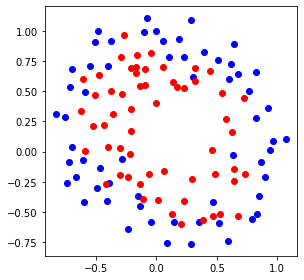

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


**Main process**

In [0]:
#initial
lr = 1
num_iter = 1000
theta = []

# map_feature creates new features based on the first input X
def map_feature(x1, x2, degree):
  temp = np.ones(len(x1)).reshape(len(x1), 1)
  for i in range(1, degree + 1):
    for j in range(i + 1):
      terms = (x1**(i-j) * x2**j).reshape(len(x1), 1)
      temp = np.hstack((temp, terms))
  return temp

# Sigmoid is an Activation function that turns the linear function to a non-linear
def sigmoid(Z):
  A =  1 / (1 + np.exp(-Z))    
  return A

# Caculate the cost function
def costFunction(h, y, lamda, theta):
  m = len(y) 
  J = 0
  J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
  J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + J_reg;
  return (J)

# Training model
def training(X, y, lr, num_iter, lamda):
  theta = np.zeros(X.shape[1])    
  J_history = []
  A_history = []
  for i in range(num_iter):
    z = np.dot(X, theta)
    h = sigmoid(z)
    acc = accuracy(X, y, theta)
    cost = costFunction(h, y, lamda, theta)
    J_history.append(cost)
    A_history.append(acc)
    gradient = np.dot(X.T, (h - y)) / y.size
    theta -= lr * (gradient + lamda * theta / y.size)
  return theta, J_history, A_history

def predict_prob(X, theta):
  return sigmoid(np.dot(X, theta))

def predict(X, theta):
  return predict_prob(X, theta) >= 0.5

def accuracy(X, y, theta):
  preds = predict(X, theta)
  return (preds == y).mean() * 100

X_map = map_feature(pointX, pointY, 9)
overfitting_theta, overfitting_cost, overfitting_accuracy = training(X_map, label, lr, num_iter, 0.005)
justright_theta, justright_cost, justright_accuracy = training(X_map, label, lr, num_iter, 0.5)
underfitting_theta, underfitting_cost, underfitting_accuracy = training(X_map, label, lr, num_iter, 5)

**Plot the training error**

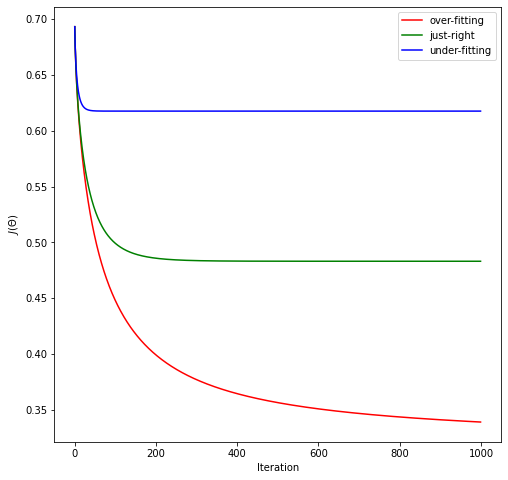

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(overfitting_cost, label = "over-fitting", color = 'r')
plt.plot(justright_cost, label = "just-right", color = 'g')
plt.plot(underfitting_cost, label = "under-fitting", color = 'b')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.show()

**Values of the chosen regularization parameters**

In [11]:
print("Theta of Over-fitting model: ", overfitting_theta)
print("Theta of Just-right model: ", justright_theta)
print("Theta of Under-fitting model: ", underfitting_theta)

Theta of Over-fitting model:  [ 3.18506904  2.23325543  3.48428177 -4.7215559  -3.93903985 -4.98306115
  1.27040645 -1.43092293 -0.822455   -0.3821618  -3.59400739  0.23462212
 -2.20492708 -1.31874748 -3.31127855 -0.20103988 -0.67002418  0.40158361
 -1.28810791 -1.28442997 -0.22448638 -2.73359718  0.32914958 -0.94541991
  0.30401977 -1.32835612 -0.92732556 -1.57463938 -0.78017132 -0.24059489
  0.08319049 -0.49166508  0.11043938 -0.75763686 -1.14093024  0.21209624
 -2.10432731  0.27495478 -0.47660265  0.15245559 -0.50644559  0.18761306
 -0.76528539 -0.7891459  -0.48786387 -0.93738222 -0.06341943 -0.03727514
 -0.16908423  0.02317571 -0.29294843  0.06122632 -0.43361896 -0.95647058
  0.51544963]
Theta of Just-right model:  [ 1.54963424e+00  9.53788967e-01  1.62693042e+00 -2.43737344e+00
 -1.45901529e+00 -1.88577567e+00  4.08500784e-01 -5.81620141e-01
 -5.04242898e-01 -6.02404501e-02 -1.78468388e+00 -1.34290107e-02
 -9.10319585e-01 -4.52531140e-01 -1.44488272e+00 -1.44132610e-01
 -2.9572981

**Plot the training accuracy**

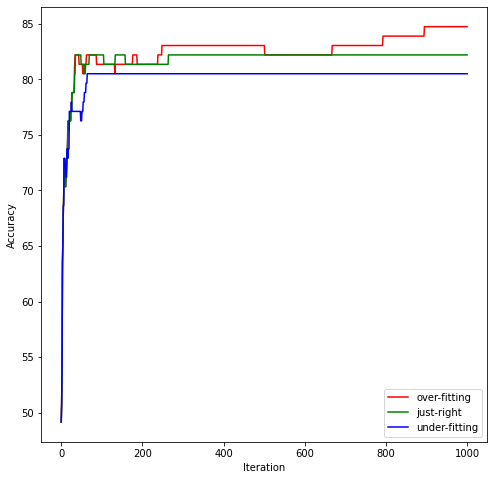

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(overfitting_accuracy, label = "over-fitting", color = 'r')
plt.plot(justright_accuracy, label = "just-right", color = 'g')
plt.plot(underfitting_accuracy, label = "under-fitting", color = 'b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The final training accuracy**

In [13]:
print("Training accuracy of over-fitting model:", accuracy(X_map, label, overfitting_theta), "%")
print("Training accuracy of just-right model:", accuracy(X_map, label, justright_theta), "%")
print("Training accuracy of under-fitting model:", accuracy(X_map, label, underfitting_theta), "%")

Training accuracy of over-fitting model: 84.7457627118644 %
Training accuracy of just-right model: 82.20338983050848 %
Training accuracy of under-fitting model: 80.50847457627118 %


**Plot the optimal classifier**

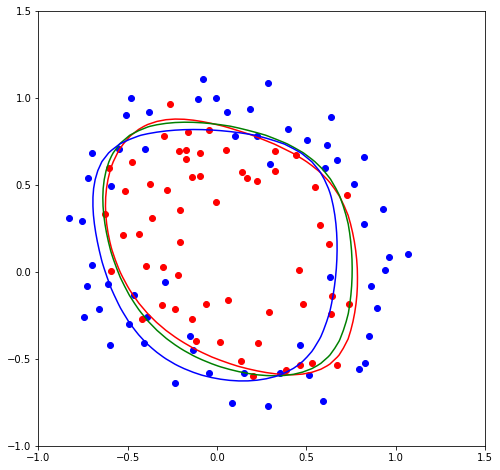

In [14]:
def map_feature_plot(x1, x2, degree):
  temp = np.ones(1)
  for i in range(1,degree+1):
    for j in range(i+1):
      terms = (x1**(i-j) * x2**j)
      temp = np.hstack((temp, terms))
  return temp

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z1=np.zeros((len(u),len(v)))
z2=np.zeros((len(u),len(v)))
z3=np.zeros((len(u),len(v)))
for i in range(len(u)):
  for j in range(len(v)):
    z1[i,j] = map_feature_plot(u[i],v[j], 9) @ overfitting_theta
    z2[i,j] = map_feature_plot(u[i],v[j], 9) @ justright_theta
    z3[i,j] = map_feature_plot(u[i],v[j], 9) @ underfitting_theta

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.contour(u,v,z1.T,0,colors='r')
plt.contour(u,v,z2.T,0,colors='g')
plt.contour(u,v,z3.T,0,colors='b')
plt.show()
